# Notebook Imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [4]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [5]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

In [6]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

# calculating the joint probability

# the dot product

In [7]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])

In [8]:
a.dot(b)

22

In [9]:
## challenge: figure out the dimensions of the dot product between X_test and prob_token_spam?

print(prob_token_spam)

[1.20818538e-02 4.92124935e-03 7.32589014e-03 ... 1.59953933e-05
 1.38626742e-04 5.86497755e-05]


In [10]:
dot_X_test_prob_token_spam = X_test.dot(prob_token_spam)

In [11]:
dot_X_test_prob_token_spam.shape

(1721,)

## Set the prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, P(Ham)} {P(X)}$$

In [12]:
PROB_SPAM = 0.3116

In [13]:
# challenge: do you recall how to take the log of a numpy array? calculate the log probability of the tokens given that the email was spam.
# This was stored in prob_token_spam.

In [14]:
print(np.log(prob_token_spam))

[ -4.41605064  -5.31419285  -4.91634061 ... -11.04320979  -8.88372554
  -9.74392681]


## Joint probability in log format

In [15]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [16]:
joint_log_spam[:5]

array([-4.67122564, 22.4771383 , 38.50811606, 10.54897984, 15.90710599])

**CHALLENGE**: calculate the log probability that the emails are non-spam given their tokens. Store the results in a variable called joint_log_ham

In [17]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-0.3116)

In [18]:
print(joint_log_ham)

[-13.61260666 -45.0418786  -86.93102252 ...   1.06985035  -1.47062646
  -1.54218335]


# Making Predictions

### cheking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$

whether the probability of an email being spam given its tokens is greater than the probability of an email being ham given its tokens

<center>or</center>

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$


**challenge**: can you create the vector of predictions, our y? Remember that spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store your results in a variable called predictions

In [19]:
prediction = (joint_log_spam > joint_log_ham)*1

In [20]:
prediction[-5:]

array([0, 0, 0, 0, 0])

In [21]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [22]:
### Simplify

joint_log_spam = X_test.dot(np.log(prob_token_spam) ) + np.log(PROB_SPAM)

joint_log_ham = X_test.dot(np.log(prob_token_ham) ) + np.log(1-0.3116)

# Metrics and evaluation

## Accuracy

In [23]:
correct_docs = (y_test == prediction).sum()

In [24]:
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1672
Docs classified incorrectly 49


In [25]:
# Accuracy 
correct_docs/len(X_test)

0.9715281812899477

In [26]:
fraction_wrong = numdocs_wrong/len(X_test)
print('fraction classified incorrectly is {:2%}'.format(fraction_wrong) )
print('accuract of the model is {:2%}'.format(1-fraction_wrong))

fraction classified incorrectly is 2.847182%
accuract of the model is 97.152818%


## Visualising the results

In [27]:
# Chart styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X| nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

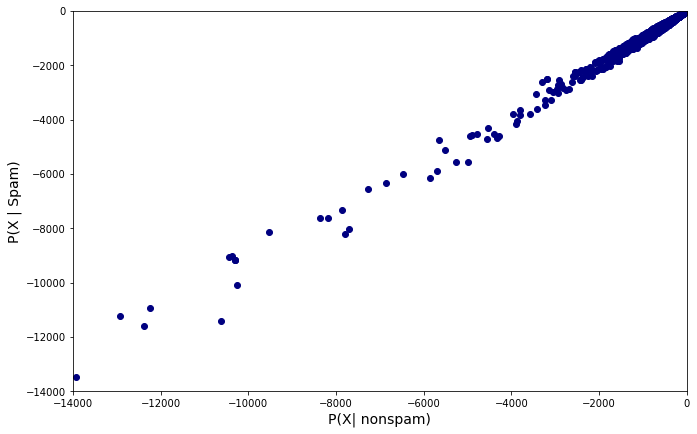

In [28]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## the desicion boundary

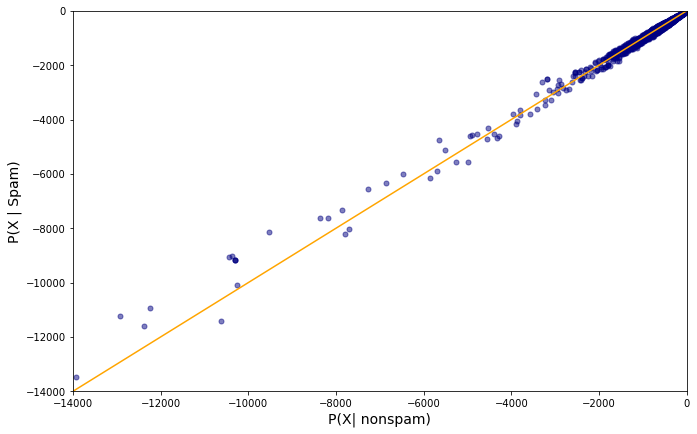

In [29]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

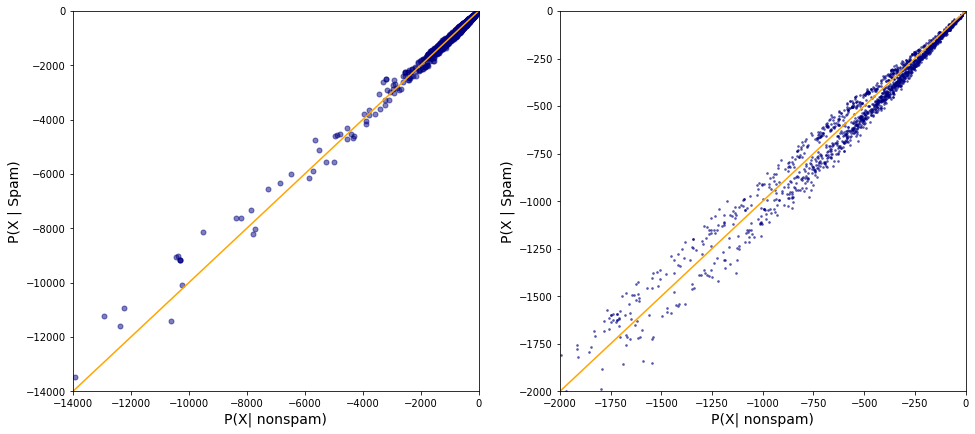

In [30]:
plt.figure(figsize=(16, 7))

#chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

#chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set Scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')


plt.show()

In [31]:
#Chart styling

sns.set_style('whitegrid')
labels = ('Actual Category')

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

/home/gian/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


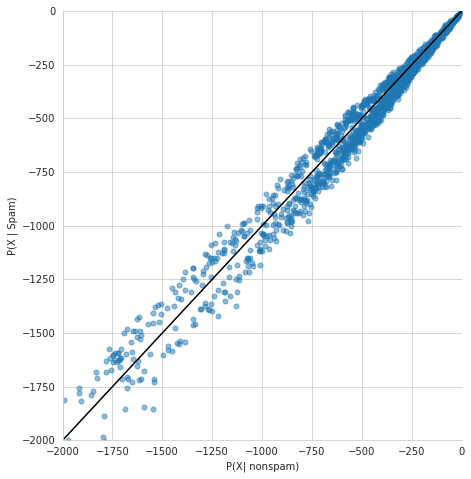

In [32]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size = 6.5, fit_reg=False,  
          scatter_kws={'alpha': 0.5, 's': 25 })
            
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

/home/gian/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


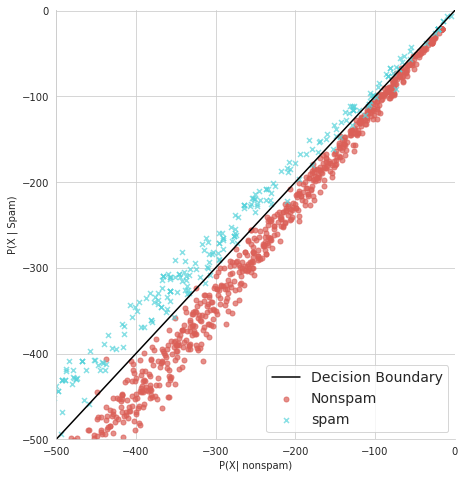

In [33]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size = 6.5, fit_reg=False, legend=False, 
          scatter_kws={'alpha': 0.7, 's': 25 }, hue=labels, markers= ['o', 'x'], palette='hls')
            
plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'spam'), loc='lower right', fontsize=14)

### False positives and false negatives

In [35]:
np.unique(prediction, return_counts=True)

(array([0, 1]), array([1167,  554]))

In [36]:
true_pos = (y_test == 1 ) & (prediction == 1) ## bitwise AND

In [37]:
true_pos.sum()

546

** challenges ** Create a numpy array that measures the false positives for each datapoint. call this variable false_pos. Then workout how many false positives there were. After you've done that, do the same for the false ngatives. Store those in a variable called false_neg.

In [41]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

8

In [42]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

41

In [43]:
## recall score = true positives / (true positives + false negatives)

## recall Score


**Challenge** : calculate the recall score. Store it in a variable called recall_score. Print the value of the recall score as a percentage rounded to two decimal places

In [55]:
recall_score = 546 / (546 + 41)
print('the recall score is {:.2%}'.format(recall_score))

the recall score is 93.02%


## Precision Score

In [52]:
 ## precision = true positives / (true positives + false positives)

In [56]:
precision_score = 546 / (546 + 8)
print('the precision score is {:.3%}'.format(recall_score))

the precision score is 93.015%


# F-Score or F1 Score

In [61]:
# f-score = 2x((Precision*Recall)/ (Precision + Recall) ) ## the harmonic mean of precision and recall

In [58]:
f1_score = 2*((precision_score*recall_score) / (precision_score + recall_score))

In [60]:
print('F Score is {:.2}'.format(f1_score))

F Score is 0.96
